# Scrape NHL data

In [18]:
def flattenjson( b, delim ):
    val = {}
    for i in b.keys():
        if isinstance( b[i], dict ):
            get = flattenjson( b[i], delim )
            for j in get.keys():
                val[ i + delim + j ] = get[j]
        else:
            val[i] = b[i]

    return val

In [19]:
import requests
import json
import csv

site = """http://www.nhl.com/stats/rest/skaters?isAggregate=false&reportType=basic&isGame=false&reportName=skatersummary&sort=[{%22property%22:%22points%22,%22direction%22:%22DESC%22},{%22property%22:%22goals%22,%22direction%22:%22DESC%22},{%22property%22:%22assists%22,%22direction%22:%22DESC%22}]&cayenneExp=gameTypeId=2%20and%20seasonId%3E=20172018%20and%20seasonId%3C=20172018"""
# Requests the site info
blob = requests.get(site).content

#Converts that info from a string to readable json
json_data = json.loads(blob)['data']

# Opens a blank CSV file
csv_file = csv.writer(open("NFL.csv","w+", newline=""))

# Writes each line one by one to the csv file
for x in json_data:
      csv_file.writerow(x)

In [20]:
site1 = """https://statsapi.web.nhl.com/api/v1/game/2017020594/feed/live"""

In [41]:
blob = requests.get(site1).content
#Converts that info from a string to readable json
json_data = json.loads(blob)

# # Opens a blank CSV file
# csv_file = csv.writer(open("NFL.csv","w+", newline=""))

# # Writes each line one by one to the csv file
# for x in json_data:
#       csv_file.writerow(x)

In [22]:
from pandas.io.json import json_normalize
df = json_normalize(json.loads(blob))

In [23]:
df.columns

Index(['copyright', 'gameData.datetime.dateTime',
       'gameData.datetime.endDateTime', 'gameData.game.pk',
       'gameData.game.season', 'gameData.game.type',
       'gameData.players.ID8470543.active',
       'gameData.players.ID8470543.alternateCaptain',
       'gameData.players.ID8470543.birthCity',
       'gameData.players.ID8470543.birthCountry',
       ...
       'liveData.plays.currentPlay.about.periodType',
       'liveData.plays.currentPlay.result.description',
       'liveData.plays.currentPlay.result.event',
       'liveData.plays.currentPlay.result.eventCode',
       'liveData.plays.currentPlay.result.eventTypeId',
       'liveData.plays.penaltyPlays', 'liveData.plays.playsByPeriod',
       'liveData.plays.scoringPlays', 'metaData.timeStamp', 'metaData.wait'],
      dtype='object', length=2464)

In [24]:
a = df['liveData.plays.allPlays']

In [25]:
json_normalize(a[0]).columns

Index(['about.dateTime', 'about.eventId', 'about.eventIdx', 'about.goals.away',
       'about.goals.home', 'about.ordinalNum', 'about.period',
       'about.periodTime', 'about.periodTimeRemaining', 'about.periodType',
       'coordinates.x', 'coordinates.y', 'players', 'result.description',
       'result.emptyNet', 'result.event', 'result.eventCode',
       'result.eventTypeId', 'result.gameWinningGoal', 'result.penaltyMinutes',
       'result.penaltySeverity', 'result.secondaryType',
       'result.strength.code', 'result.strength.name', 'team.id', 'team.link',
       'team.name', 'team.triCode'],
      dtype='object')

In [26]:
plays = json_normalize(a[0])

In [27]:
event_coord = plays.loc[:,['result.event','coordinates.x','coordinates.y']]

In [28]:
event_coord['result.event'].unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff', 'Shot',
       'Stoppage', 'Hit', 'Giveaway', 'Missed Shot', 'Takeaway', 'Penalty',
       'Blocked Shot', 'Period End', 'Period Official', 'Goal', 'Game End'], dtype=object)

In [29]:
event_coord[event_coord['result.event'] == 'Penalty']

,result.event,coordinates.x,coordinates.y
19,Penalty,-49.0,38.0
49,Penalty,94.0,17.0
71,Penalty,2.0,-24.0
121,Penalty,-39.0,33.0
206,Penalty,-87.0,24.0
212,Penalty,-21.0,-27.0
224,Penalty,-3.0,28.0
250,Penalty,-67.0,4.0
257,Penalty,NaN,NaN


In [30]:
plays = plays.loc[:,['result.event','result.description','coordinates.x','coordinates.y']]

In [50]:
from matplotlib import pyplot as plt

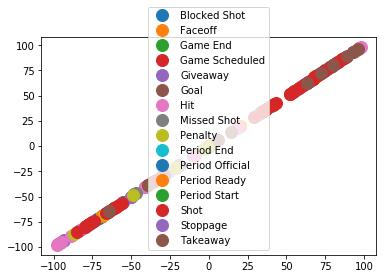

In [55]:
abc = plays.groupby('result.event')

fig, ax = plt.subplots()
ax.margins(0.05) 
for n,v in abc:
#     print(v)
    ax.plot(v['coordinates.x'], v['coordinates.x'], marker='o', linestyle='', ms=12, label=n)
ax.legend()

plt.show()

In [58]:
from sklearn.datasets import load_iris

In [31]:
inp = map( lambda x: flattenjson( x, "__" ), json_data )


In [32]:
inp

In [33]:
[x for x in inp]

AttributeError: 'str' object has no attribute 'keys'

In [34]:
columns = [ x for row in inp for x in row.keys() ]
columns = list( set( columns ) )

AttributeError: 'str' object has no attribute 'keys'

In [37]:
import pandas as pd
df = pd.DataFrame.from_dict(json_data)


In [38]:
df.columns

Index(['copyright', 'gameData', 'gamePk', 'link', 'liveData', 'metaData'], dtype='object')

In [39]:
df.loc[:,["assists","playerName","points"]]

KeyError: "None of [['assists', 'playerName', 'points']] are in the [columns]"

In [40]:
df.to_csv("NHL.csv")